# Comparison of index vs sequential vs binary search

In [1]:
import random
import matplotlib.pyplot as plt
import time

Example: create a list of random integers

In [2]:
rand_list = random.sample(range(1, 100), 7)
rand_list

[46, 27, 72, 9, 82, 28, 84]

Select a random element from the list

In [3]:
find_this_value = random.choice(rand_list)
find_this_value

46

# Apply the default search algorithm:

In [4]:
print(rand_list.index(find_this_value))

0


To see the implementation, view

https://github.com/python/cpython/blob/master/Objects/listobject.c#L2524

# A naive algorithm

In [7]:
def sequential_search(lst, value):
    for loc,this_entry in enumerate(lst):
        if (this_entry==value): 
            return loc

In [8]:
sequential_search(rand_list, rand_list[3])

3

As expected, the location of that value is in third position in the list

# binary search, iterative

An alternative function that searches a list of integers

In [9]:
#https://rosettacode.org/wiki/Binary_search#Python
def binary_search_iterative(l, value):
    low = 0
    high = len(l)-1
    while low <= high: 
        mid = (low+high)//2
#        print(mid)
        if l[mid] > value: high = mid-1
        elif l[mid] < value: low = mid+1
        else: return mid
    return -1

verify this algorithm produces the same result

In [10]:
print("position of sought value in sorted list is",binary_search_iterative(rand_list, rand_list[3]))

position of sought value in sorted list is 3


# binary search, recursive 
a fourth, more complicated approach

In [11]:
# https://rosettacode.org/wiki/Binary_search#Python
def binary_search_recursive(l, value, low = 0, high = -1):
    if not l: return -1
    if(high == -1): high = len(l)-1
    if low >= high:
        if l[low] == value: return low
        else: return -1
    mid = (low+high)//2
    if l[mid] > value: return binary_search_recursive(l, value, low, mid-1)
    elif l[mid] < value: return binary_search_recursive(l, value, mid+1, high)
    else: return mid

find the third element in the list

In [12]:
value_to_find = rand_list[3]
value_to_find

9

In [13]:
print("position of sought value in sorted list is")
binary_search_recursive(rand_list, value_to_find)

position of sought value in sorted list is


3

# Search lists of increasing length

In [14]:
number_of_tests=3
initial_val=10000
list_of_list_lengths=[initial_val,
                      initial_val*10,
                      initial_val*100,
                      initial_val*1000]#,
#                      initial_val*10000]

In [15]:
times_dict_indx={}
times_dict_ss={}
times_dict_bsi={}
times_dict_bsr={}
for list_len in list_of_list_lengths:
    start_time_iteration=time.time()
    times_from_test_indx= []
    times_from_test_ss  = []
    times_from_test_bsi = []
    times_from_test_bsr = []
    for test_indx in range(number_of_tests):
        rand_list = random.sample(range(1, list_len*10), list_len)
        rand_list.sort()
        value_to_find = random.choice(rand_list)

        start_time_for_search = time.time()        
        _=rand_list.index(value_to_find) # don't bother saving the output
        times_from_test_indx.append(time.time()-start_time_for_search)        
        
        start_time_for_search = time.time()        
        _=sequential_search(rand_list, value_to_find) # don't bother saving the output
        times_from_test_ss.append(time.time()-start_time_for_search)        
        
        start_time_for_search = time.time()
        _=binary_search_iterative(rand_list, value_to_find) # don't bother saving the output
        times_from_test_bsi.append(time.time()-start_time_for_search)

        start_time_for_search = time.time()
        _=binary_search_recursive(rand_list, value_to_find) # don't bother saving the output
        times_from_test_bsr.append(time.time()-start_time_for_search)

    times_dict_indx[list_len]=sum(times_from_test_indx)/len(times_from_test_indx)
    times_dict_ss[list_len] =sum(times_from_test_ss )/len(times_from_test_ss )
    times_dict_bsi[list_len]=sum(times_from_test_bsi)/len(times_from_test_bsi)
    times_dict_bsr[list_len]=sum(times_from_test_bsr)/len(times_from_test_bsr)
    
    print('elapsed time:',round(time.time()-start_time_iteration,2),'seconds for',list_len)

elapsed time: 0.03 seconds for 10000
elapsed time: 0.43 seconds for 100000
elapsed time: 4.03 seconds for 1000000
elapsed time: 46.79 seconds for 10000000


# what is the average timing result from each list size?

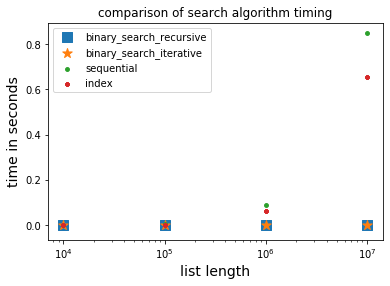

In [16]:
plt.scatter(times_dict_bsr.keys(),times_dict_bsr.values(),label='binary_search_recursive',marker='s',s=100)
plt.scatter(times_dict_bsi.keys(),times_dict_bsi.values(),label='binary_search_iterative',marker='*',s=100)
plt.scatter(times_dict_ss.keys(),times_dict_ss.values(),label='sequential',s=15)
plt.scatter(times_dict_indx.keys(),times_dict_indx.values(),label='index',marker='P',s=15)
ax = plt.gca()
ax.set_xscale('log')
#ax.set_yscale('log')
plt.legend()
plt.xlabel('list length',fontsize=14)
plt.ylabel('time in seconds',fontsize=14);
plt.title('comparison of search algorithm timing');

# Is the extra complexity of a recursive function relevant?

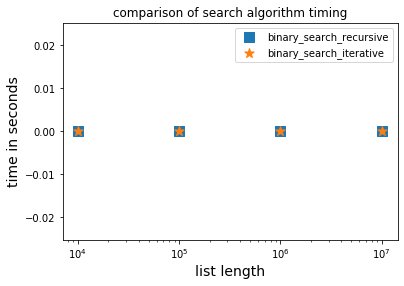

In [17]:
plt.scatter(times_dict_bsr.keys(),times_dict_bsr.values(),label='binary_search_recursive',marker='s',s=100)
plt.scatter(times_dict_bsi.keys(),times_dict_bsi.values(),label='binary_search_iterative',marker='*',s=100)
ax = plt.gca()
ax.set_xscale('log')
#ax.set_yscale('log')
plt.legend()
plt.xlabel('list length',fontsize=14)
plt.ylabel('time in seconds',fontsize=14);
plt.title('comparison of search algorithm timing');